In [1]:
#tentei exportar classes entre notebook porem não foi possivel, logo voltou fazer tudo o processo POO dentro de um unico notebook
#!jupyter nbconvert --to script extracaoDados.ipynb

import pandas as pd
class carregarInfo():
    
    def __init__(self):
        self.df01 = None

    def readCsv(self, arquivo_csv):
        try:
            self.df01 = pd.read_csv(arquivo_csv)  
            #print("Arquivo CSV carregado com sucesso.")
        except FileNotFoundError:
             print(f"Erro: O arquivo {self.__nome} não foi encontrado.")
        except Exception as e:
            print(f"Erro ao carregar os dados: {str(e)}")
    def mostraCsv(self):
        if self.df01 is not None:
            return self.df01
        else:
            return "Os dados ainda não foram carregados"
    def dropDados(self, atribute1, atribute2):
        #posso usar *atribute no lugar de atribute1, para o metodo muscar uma lista de colunas para exclusão.
        self.df01.drop(columns=[atribute1, atribute2], inplace=True)

In [2]:
class transformarDados():
    
    def __init__(self, carregarInfo):
        self.carregarInfo = carregarInfo
        self.dadosNull_resultado = None
        self.df = None
    
    def vizualizarPorc(self):
        if self.carregarInfo is not None:
            self.resultado = (self.carregarInfo.mostraCsv().isna().sum() / self.carregarInfo.mostraCsv().count()) *100
            return self.resultado.round(2)
        else:
            return None
    def dadosNull(self):
        ValorNulos = self.carregarInfo.mostraCsv().isna().sum()
        self.dadosNull_resultado = ValorNulos
        return self.dadosNull_resultado.round(2)
        
    def alteraValorMedio(self):
        if self.dadosNull_resultado is not None:
            self.df = self.carregarInfo.mostraCsv()
            self.df.fillna(self.df.median(), inplace=True)
            return self.df
        else:
            return None
    def mostrarCsvTrans(self):
        if self.df is not None:
            return self.df
        else:
            return None
        
    
        


In [3]:
from sklearn.preprocessing import Normalizer

class normalizarDados():
    def __init__(self, dadosBrutos):
        self.dadosBrutos = dadosBrutos
        self.dadosNormalizados = None
        
    def escalarDados(self):
        if self.dadosBrutos is not None:
            self.dadosNormalizados = Normalizer().fit_transform(self.dadosBrutos.values)
            return self.dadosNormalizados
        else:
            return None

In [55]:
from sklearn.cluster import KMeans
class modeloKNN():
    def __init__(self, n_clusters, n_init, max_iter):
        self.modelo = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)
        self.label = self.modelo
        
    def aplicarModelo(self, dadosNorm):
        return  self.modelo.fit_predict(dadosNorm)       
    
    def labels(self):
        return self.label.labels_
    
    def cemtroids(self):
        return self.label.cluster_centers_


In [5]:
from sklearn import metrics
class validacoes():
    def __init__(self, modelo, values):
        self.modelo = modelo
        self.values = values
        
    def validar(self):
        validacaoSilho = metrics.silhouette_score(self.values, self.modelo, metric='euclidean')
        validacaoBould = metrics.davies_bouldin_score(self.values, self.modelo)
        validarCalinsky = metrics.calinski_harabasz_score(self.values, self.modelo)
        return validacaoSilho, validacaoBould, validarCalinsky

# PIPELINE

In [59]:

dadosOrigem = carregarInfo()
dadosOrigem.readCsv("CC GENERAL.csv")
dadosOrigem.dropDados('CUST_ID', 'TENURE')
#dadosOrigem.mostraCsv()
dadosTrans = transformarDados(dadosOrigem)
#dadosTrans.vizualizarPorc()
dadosTrans.dadosNull()
dadosTrans.alteraValorMedio()
dadosTrans.vizualizarPorc()
dadosNorm = normalizarDados(dadosTrans.mostrarCsvTrans())
values = dadosNorm.escalarDados()
rodarModelo = modeloKNN(5, 10, 300)
modelo = rodarModelo.aplicarModelo(values)

validarDados = validacoes(modelo, values)
validarDados.validar()


(0.36458263912919026, 1.075244659496931, 3431.784178549532)

In [58]:
rodarModelo.labels()

array([2, 3, 2, ..., 2, 2, 1], dtype=int32)

In [69]:
centroids = rodarModelo.cemtroids()

In [8]:

descricao = dadosTrans.mostrarCsvTrans().count()
descricao

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [9]:
dados = dadosTrans.mostrarCsvTrans()
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


### Validação Relativa


In [10]:
rodarModelo2 = modeloKNN(3, 10, 300)
modelo2 = rodarModelo2.aplicarModelo(values)
validarDados2 = validacoes(modelo2, values)
validarDados2.validar()

(0.32724464582661594, 1.3093507662143309, 3526.466834451541)

In [11]:
rodarModelo3 = modeloKNN(50, 10, 300)
modelo3 = rodarModelo3.aplicarModelo(values)
validarDados3 = validacoes(modelo3, values)
validarDados3.validar()


(0.23894646882568896, 1.259544295648933, 1602.4227492897583)

dados aleatorios:

In [12]:
import numpy as np
random_data = np.random.rand(8950,16)
rodarModelo4 = modeloKNN(5, 10, 300)
modelo4 = rodarModelo4.aplicarModelo(random_data)
validarDados4 = validacoes(modelo4, random_data)
validarDados4.validar()


(0.03895169879577237, 3.5616582712729348, 301.80789957033124)

In [13]:
validarDados.validar()

(0.3644845919974304, 1.0757138590613293, 3431.79374284143)

Estabilidade do clusters

In [14]:
set1, set2, set3 = np.array_split(dados,3)


In [15]:
rodarModelo5 = modeloKNN(5, 10, 300)
modelo5 = rodarModelo5.aplicarModelo(set1)
validarDados5 = validacoes(modelo5, set1)
validarDados5.validar()


(0.35685834047826887, 1.2747426884471202, 973.3346703302818)

In [16]:
rodarModelo6 = modeloKNN(5, 10, 300)
modelo6 = rodarModelo6.aplicarModelo(set2)
validarDados6 = validacoes(modelo6, set2)
validarDados6.validar()


(0.3656840798136391, 1.1820496745649332, 858.6953189575075)

In [17]:
rodarModelo7 = modeloKNN(5, 10, 300)
modelo7 = rodarModelo7.aplicarModelo(set3)
validarDados7 = validacoes(modelo7, set3)
validarDados7.validar()


(0.3960261654283308, 1.2701193135380988, 781.8536067374855)

Gerando Grafico

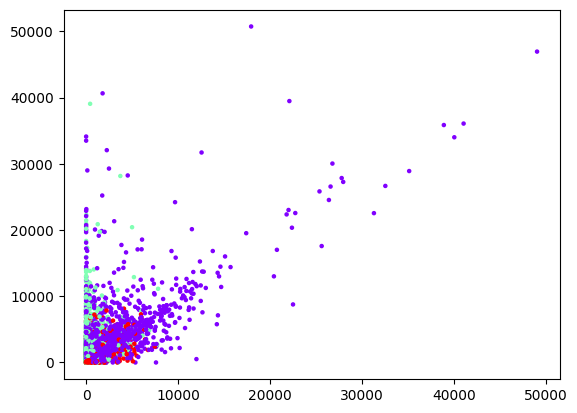

In [18]:
import matplotlib.pyplot as plt

plt.scatter(dados["PURCHASES"], dados["PAYMENTS"],c=modelo2, s=5, cmap='rainbow')

In [19]:
import seaborn as sns
dados["cluster"] = modelo


In [20]:
#sns.pairplot(dados[0:],hue="cluster")

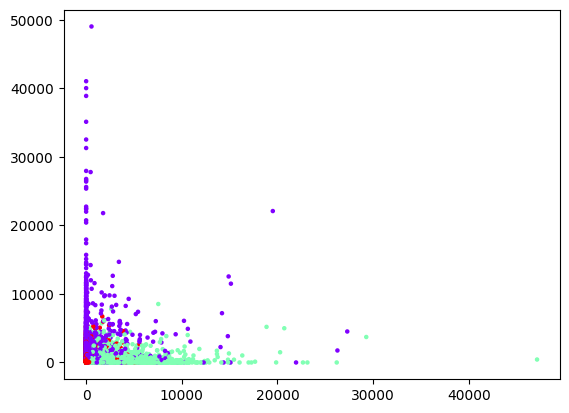

In [21]:
import matplotlib.pyplot as plt

plt.scatter(dados["CASH_ADVANCE"], dados["PURCHASES"],c=modelo2, s=5, cmap='rainbow')

descrevendo os atributos

In [70]:
dados.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.024195  1982.950586   0.000000   506.925348   
1        3278.0   443.992358   846.597972   0.000000    23.315538   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1540.0  1142.222657  1664.035755   0.000000   211.566656   
4        2649.0  3037.962543  2478.838161   6.824905  1256.612223   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1          82.992153   411.193793   9630.367575            3278.0  0.774417   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3         554.332740  1370.859355  19043.138560            1540.0  0.928053   
4        2174.018945  4223.867789  18495.558550            2649.0  0.963740   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.718306  21235.065300           1072.0  0.117384   
1        ...       248.800040   4483.503862           3278.0  0.246549   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       524.184580  18621.013310           1540.0  0.278582   
4        ...      1330.593643   8345.641905           2649.0  0.001799   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186853  0.0  0.0  0.083333  0.142857  1.0  
1        0.346601  0.0  0.0  0.000000  0.444444  1.0  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.367203  0.0  0.0  0.083333  0.545455  1.0  
4        0.023260  0.0  0.0  0.000000  0.000000  0.6  

[5 rows x 128 columns]

In [71]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


In [90]:
description = dados.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
media = description.mean()
media['n_clients'] = n_clients
media

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
1,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
2,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411
3,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
4,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
